In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.io.fits as fitsio
from astropy.coordinates import SkyCoord
import astropy.units as u

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from importlib import reload
import sys
sys.path.append('/Users/nora/projects/stream_search/code')
# import plot_density
# reload(plot_density)
import streamlib
reload(streamlib)
# import skymap
# reload(skymap)
# print(skymap.__version__)
import galstreams
reload(galstreams)

<module 'galstreams' from '/Users/nora/miniconda3/envs/py3/lib/python3.7/site-packages/galstreams-1.0.0-py3.7.egg/galstreams/__init__.py'>

In [7]:
mw_streams = galstreams.MWStreams(verbose=False)

In [8]:
plot_density.plot_pretty(figsize=(12,12))

NameError: name 'plot_density' is not defined

# Filtered Data

In [9]:
import load_data
reload(load_data)
hpxcube, fracdet, modulus = load_data.load_data(survey='DES_Y6', z=0.0001, age=11.0, gmax=23.0)

Reading ../data/DES_Y6_iso_hpxcube_NGC1851.fits.gz...


In [10]:
modulus

array([15.3, 15.4, 15.5])

In [77]:
print(hpxcube.max())

1869.0


In [78]:
mw_streams.keys()

dict_keys(['VOD/VSS', 'Monoceros', 'EBS', 'Her-Aq', 'PAndAS', 'Tri-And', 'Tri-And2', 'PiscesOv', 'EriPhe', 'Phoenix', 'WG1', 'WG2', 'WG3', 'WG4', 'Acheron', 'Cocytos', 'Lethe', 'Styx', 'ACS', 'Pal15', 'Eridanus', 'TucanaIII', 'Indus', 'Jhelum', 'Ravi', 'Chenab', 'Elqui', 'Aliqa_Uma', 'Turbio', 'Willka_Yaku', 'Turranburra', 'Wambelong', 'Palca', 'Jet', 'Gaia-1', 'Gaia-2', 'Gaia-3', 'Gaia-4', 'Gaia-5', 'PS1-A', 'PS1-B', 'PS1-C', 'PS1-D', 'PS1-E', 'ATLAS', 'Ophiucus', 'Sangarius', 'Scamander', 'Corvus', '20.0-1', 'Sgr-L10', 'Orphan', 'Pal5', 'GD-1', 'Tri/Pis', 'NGC5466', 'Alpheus', 'Hermus', 'Hyllus', 'Cetus', 'Kwando', 'Molonglo', 'Murrumbidgee', 'Orinoco', 'Phlegethon', 'Slidr', 'Sylgr', 'Ylgr', 'Fimbulthul', 'Svol', 'Fjorm', 'Gjoll', 'Leiptr'])

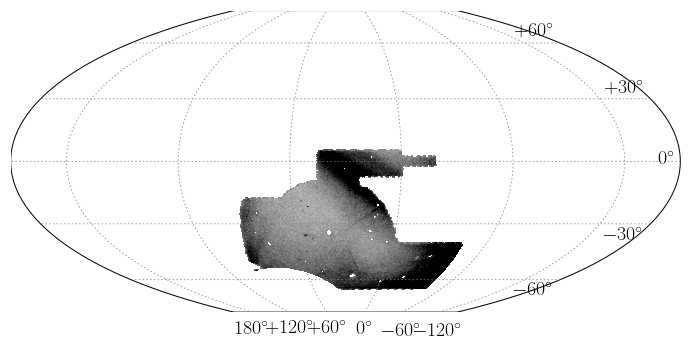

In [80]:
plot_density.plot_pretty(fontsize=20)
reload(plot_density)
mu = 16
coords='cel'
lon, lat = 30, -30
center = (lon, lat)
vmin, vmax = 0, 12
sigma = 0.2
proj = 'mbtfpq'
stream = 'ATLAS'

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
smap = plot_density.plot_density(data, 0, center=center, vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=1000, smooth=sigma)


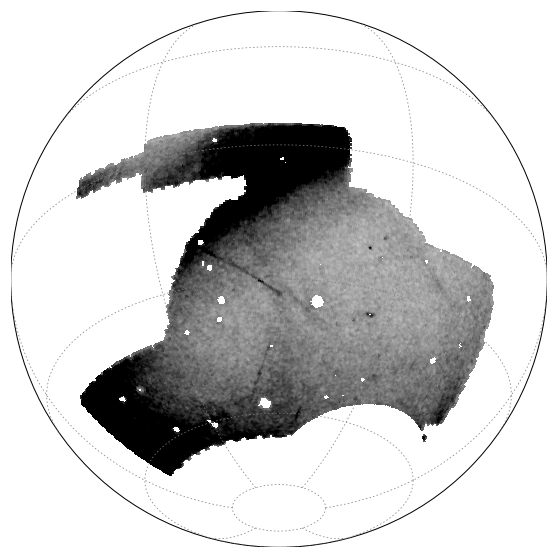

In [89]:
reload(plot_density)
plot_density.plot_pretty()
mu = 16.8
coords='cel'
lon, lat = 30, -30
center = (lon, lat)
vmin, vmax = 0, 9
sigma = 0.2
proj = 'ortho'
stream = 'ATLAS'

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
smap = plot_density.plot_density(data, 0, center=center, vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=1000, smooth=sigma)

32.49999999999999 -30.023630299246015 -0.00834242232229585


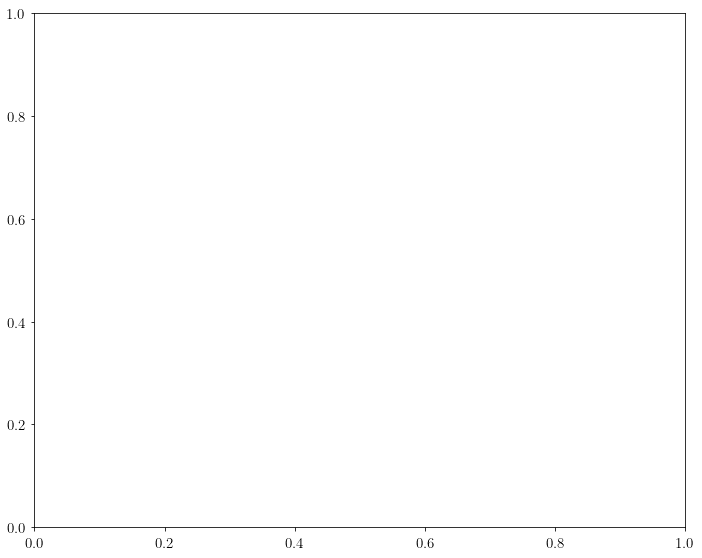

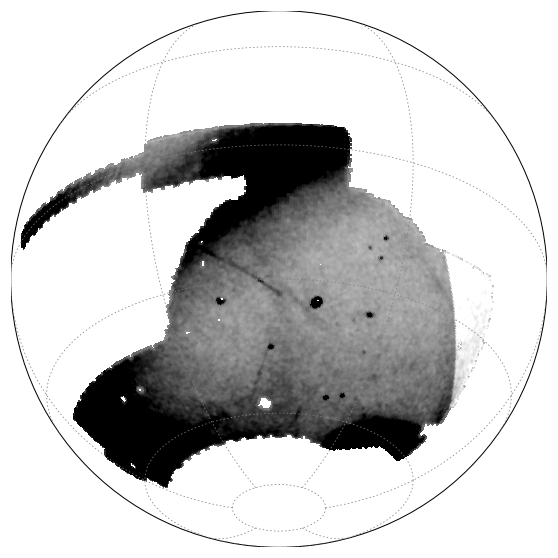

In [97]:
reload(plot_density)
plot_density.plot_pretty()
mu = 16.8
coords='cel'
lon, lat = 30, -30
center = (lon, lat)
vmin, vmax = 0, 9
sigma = 0.2
proj = 'ortho'
stream = 'ATLAS'

proj1 = plot_density_healpy.get_ortho_proj(ends=[[30, -30],[35, -30]], half_sky=True)

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
data_unm = plot_density_healpy.prepare_data(mu, hpxcube, modulus, fracdet, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
bkg = plot_density.fit_background(data, center=center, coords=coords, coord_stream=stream, proj=proj, sigma=sigma, deg=5)
bkg.mask = data_unm.mask

smap = plot_density.plot_density(data_unm-bkg, 0, center=center, vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=1000, smooth=sigma)



27.499999999999996 -30.023630299246005 0.0026037557094916184
16.8


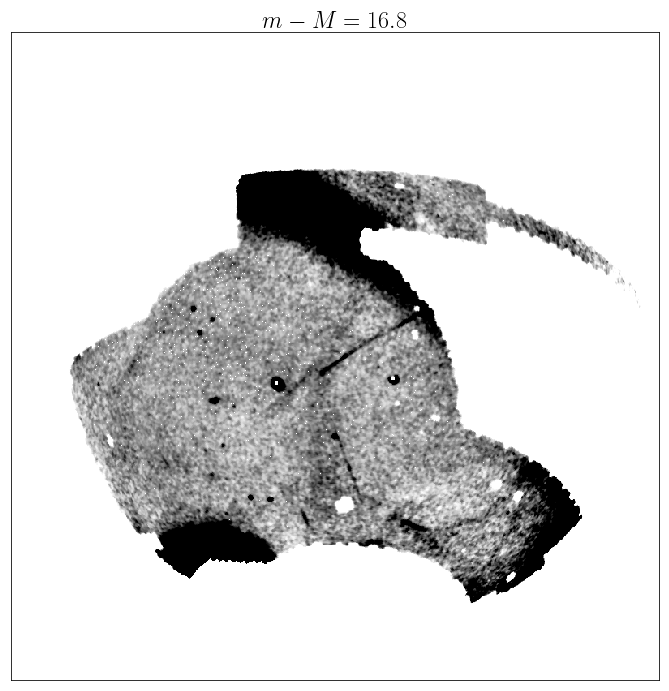

In [117]:
import plot_density_healpy
reload(plot_density_healpy)
import load_data
reload(load_data)
import streamlib
reload(streamlib)
import healpy as hp
from matplotlib.path import Path
plot_density.plot_pretty(fontsize=20)

proj1 = plot_density_healpy.get_ortho_proj(ends=[[25, -30],[30, -30]], half_sky=True)

# mu = 16.8
# for mu in modulus:
for mu in [16.8]:
    print(mu)

    data = plot_density_healpy.prepare_data(mu, hpxcube, modulus, fracdet, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=False, globs_dwarfs=True)
    data_unm = plot_density_healpy.prepare_data(mu, hpxcube, modulus, fracdet, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
    bkg1 = plot_density_healpy.fit_bkg(data, proj1, sigma=0.1)
    bkg1.mask = data_unm.mask

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax1, im1 = plot_density_healpy.plot_proj(proj1, data_unm - bkg1, vmin=-2, vmax=2, ax=ax)
    ax1.set_title(r'$m - M = %.1f$' %mu)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    
    # plot_density_healpy.plot_stream_footprints(ax1, proj1, 16., 100.)
    
#     plt.savefig('../plots/DES_hack/DES_Y6_%.1f.png' %mu)
#     plt.close('all')
    # xmin, xmax, ymin, ymax = -0.6, 0.8, -0.5, 0.4
    # ax1.set_xlim(xmin, xmax)
    # ax1.set_ylim(ymin, ymax)

In [ ]:
mw_streams['TucanaIII']

In [ ]:
reload(plot_density)
smap = plot_density.plot_density(data, bkg, center=(120,30), vmax=18)
smap = plot_density.plot_density(data_north, bkg, center=(120,30), vmax=20, smap=smap)
# smap = plot_density.plot_density(data_ps1, bkg, center=(120,30), vmax=20, smap=smap)

# smap = plot_density.plot_density(data_ps1, bkg, center=(120,30), vmax=20)
smap = plot_density.plot_density(data, bkg, center=(120,30), vmax=20)
smap = plot_density.plot_density(data_north, bkg, center=(120,30), vmax=20, smap=smap)

# plot_density.plot_stream_list(smap, ['GD-1'])
plot_density.plot_streams(smap, mu, dmu=100)
# plot_density.plot_dwarfs_globs(smap, data, mu, 50, coords=coords, coord_stream=stream)

# Healpy

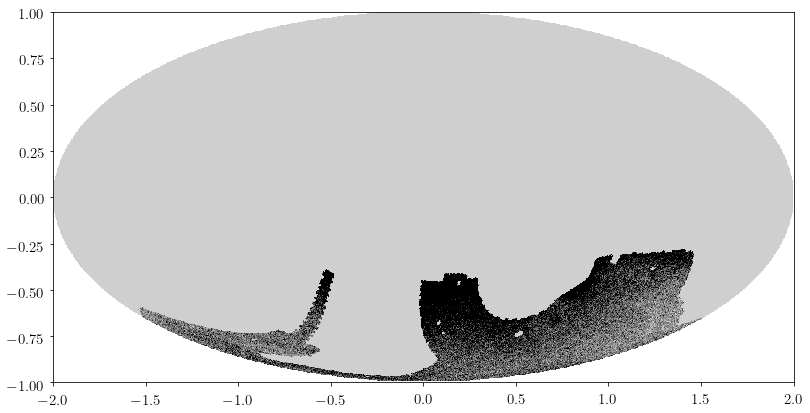

In [31]:
import healpy as hp

mu = 16.0
hpxmap = hpxcube[:,np.argmin(np.abs(mu-modulus))]

nside = hp.npix2nside(hpxmap.shape[0])
func = lambda x, y, z: hp.vec2pix(nside, x, y, z)

proj = hp.projector.MollweideProj(xsize=1024, rot=[266.4, -28.9, 59.0])
img = proj.projmap(hpxmap, func)


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.imshow(img, origin='bottom', vmin=-5, vmax=12, cmap='Greys', extent=proj.get_extent())
plt.show()

## ATLAS

In [82]:
import astropy.coordinates as coord
import gala.coordinates as gc

def zyx_euler_from_endpoints(lon1, lat1, lon2, lat2):
    c1 = coord.SkyCoord(lon1*u.deg, lat1*u.deg)
    c2 = coord.SkyCoord(lon2*u.deg, lat2*u.deg)
    fr = gc.GreatCircleICRSFrame.from_endpoints(c1, c2)
    origin = fr.realize_frame(coord.UnitSphericalRepresentation(0*u.deg, 0*u.deg))

    gc_icrs = origin.transform_to(coord.ICRS)
    R = gc.greatcircle.reference_to_greatcircle(coord.ICRS, fr)
    psi = -np.degrees(np.arctan2(R[2,1], R[2,2]))
   
    return [gc_icrs.ra.degree, gc_icrs.dec.degree, psi]

def get_vscale(img, q=[5, 95]):
    from astropy.stats import sigma_clip
   
    _tmp = img.ravel()
    stdfunc = lambda x,axis: 1.5*np.median(np.abs(x-np.median(x,axis=axis)), axis=axis)
    _tmp_clipped = sigma_clip(_tmp[_tmp != 0], stdfunc=stdfunc)
   
    return np.percentile(_tmp_clipped[_tmp_clipped > 0], q)

In [83]:
# xy = proj.ang2xy(ra, dec, lonlat=True)

reload(streamlib)
atlas = streamlib.load_stream.get_stream('ATLAS')
aliqa_uma = streamlib.load_stream.get_stream('Aliqa Uma')
phoenix = streamlib.load_stream.get_stream('Phoenix')
print(phoenix['ends'])
# print(mw_streams['Phoenix'].end_f, mw_streams['Phoenix'].end_o)
stream = mw_streams['Phoenix']
print([[stream.end_o.ra.deg, stream.end_o.dec.deg], [stream.end_f.ra.deg, stream.end_f.dec.deg]])

# print(aliqa_uma['ends'])
# print(atlas['ends'])

ends = atlas['ends']
# ends = [atlas['ends'][0], aliqa_uma['ends'][1]]
print(ends)

print([[19.465113557599395, -26.584615187212712], [31.04372386479431, -32.98118501241838]])
# 25.068645522575792 -29.909239371068143 -42.37229980876416
# m-M = 16.0

# phi, theta, psi = streamlib.results.euler_angles(atlas['ends'][0][0], atlas['ends'][0][1], atlas['ends'][1][0], atlas['ends'][1][1])
phi, theta, psi = zyx_euler_from_endpoints(ends[0][0], ends[0][1], ends[1][0], ends[1][1])
# print(phi, theta, psi)

[[20.08, -55.29], [27.88, -42.69]]
[[20.082460505880235, -56.996486198871246], [27.0343557428393, -45.05609871166725]]
[[9.29, -20.9], [30.71, -33.19]]
[[19.465113557599395, -26.584615187212712], [31.04372386479431, -32.98118501241838]]


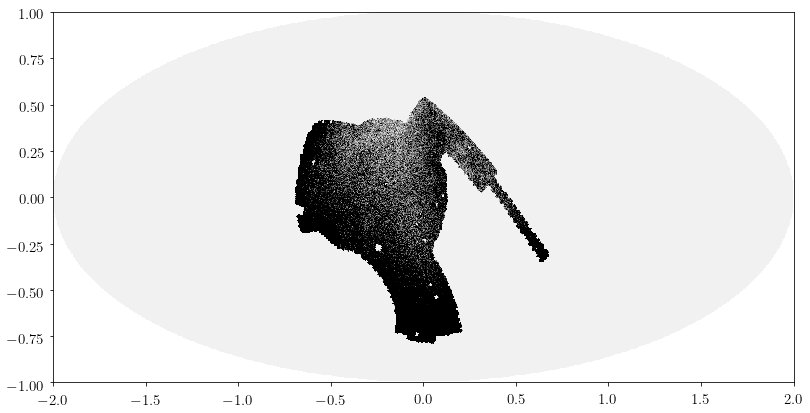

In [34]:
import healpy as hp

mu = 16.0
hpxmap = np.sum(hpxcube[:,np.argmin(np.abs(mu-modulus))-5:np.argmin(np.abs(mu-modulus))+5], axis=1)

nside = hp.npix2nside(hpxmap.shape[0])
func = lambda x, y, z: hp.vec2pix(nside, x, y, z)

proj = hp.projector.MollweideProj(xsize=1024, rot=[phi, theta, psi])
img = proj.projmap(hpxmap, func)


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.imshow(img, origin='bottom', vmin=-10, vmax=80, cmap='Greys', extent=proj.get_extent())
plt.show()

m-M = 17.0
5.2225940385675074e-05 6.91821509602994


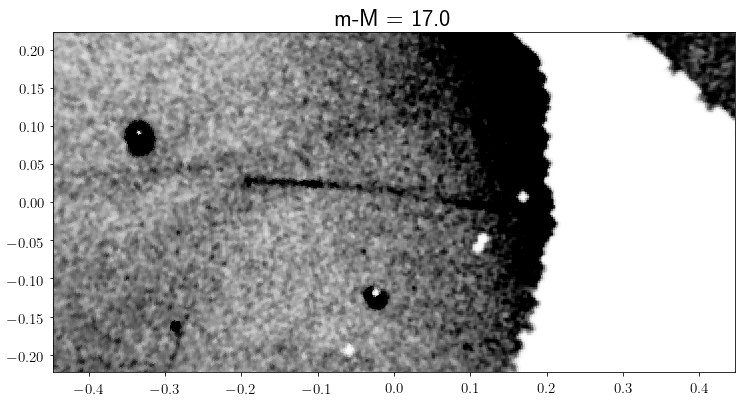

In [84]:
from healpy.sphtfunc import smoothing
dmu = 0.1
# for mu in np.arange(15, 18+dmu/2., dmu):
for mu in [17.0]:
    print('m-M = %.1f' %mu)
    hpxmap = hpxcube[:,np.argmin(np.abs(mu-modulus))]
    nside = hp.npix2nside(hpxmap.shape[0])
    func = lambda x, y, z: hp.vec2pix(nside, x, y, z)

    hpxmap_smooth = hp.smoothing(hpxmap, sigma=np.radians(0.12), verbose=False)
    proj = hp.projector.GnomonicProj(xsize=1024, ysize=512, rot=[phi, theta, psi], reso=3.0)
    img = proj.projmap(hpxmap_smooth, func)

    vmin, vmax = get_vscale(img, q=[1, 90])
    print(vmin, vmax)
    
    fig, ax = plt.subplots(1,1, figsize=(12, 6))
    ax.imshow(img, origin='bottom', vmin=vmin, vmax=vmax, cmap='Greys', extent=proj.get_extent())
    plt.title('m-M = %.1f' %mu)
    
#     plt.savefig('../plots/atlas/atlas_aliqa_uma_%.1f.png' %(mu))
#     plt.close('all')
    
# plt.show()

# General

16.505149978319906 16.505149978319906
[[19.465113557599395, -26.584615187212712], [31.04372386479431, -32.98118501241838]]
25.068645522575792 -29.909239371068143 -32.59090315589564
m-M = 16.5
vmin, vmax =  6.365868997049162e-06 9.807803859410948


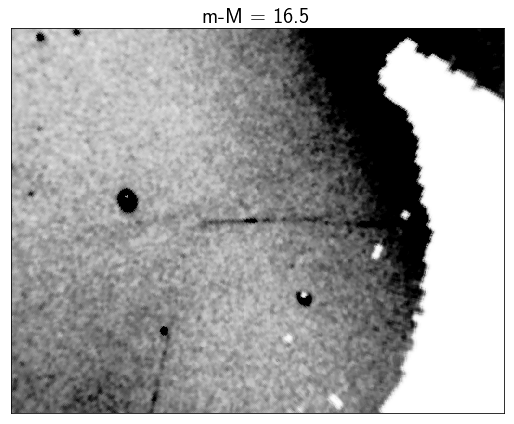

In [87]:
# %matplotlib notebook
%matplotlib inline
import plot_density_healpy
reload(plot_density_healpy)

stream = 'ATLAS'
mu = plot_density.dist2mod(mw_streams[stream].Rhel[0])

ax, proj = plot_density_healpy.plot_stream(hpxcube, modulus, stream, mu_min=mu, mu_max=mu, save=False)

# NGC 1851

In [51]:
ra_ngc1851, dec_ngc1851 =  78.528, -40.047

In [55]:
mu_ngc1851 = plot_density.dist2mod(12.1)
print(mu_ngc1851)

15.41392685158225


In [47]:
import filter_data
iso = filter_data.isochrone_factory('Dotter', survey='DES')

In [49]:
iso.feh2z(-1.1)

0.0011792622716894794

In [50]:
reload(load_data)
hpxcube1, fracdet1, modulus1 = load_data.load_data(survey='DES_Y6', z=0.0001, age=11.0, gmax=23.0)

Reading /Users/nora/projects/stream_search/data/iso_hpxcube_desy6.fits.gz...
fracdet test 392507


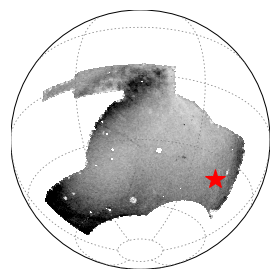

In [52]:
reload(plot_density)
mu = 16.8
coords='cel'
lon, lat = 30, -30
center = (lon, lat)
vmin, vmax = 0, 18
sigma = 0.2
proj = 'ortho'
stream = 'ATLAS'

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
smap = plot_density.plot_density(data, 0, center=center, vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=1000, smooth=sigma)

x, y = smap(ra_ngc1851, dec_ngc1851)
smap.plot(x, y, 'r*', ms=20)

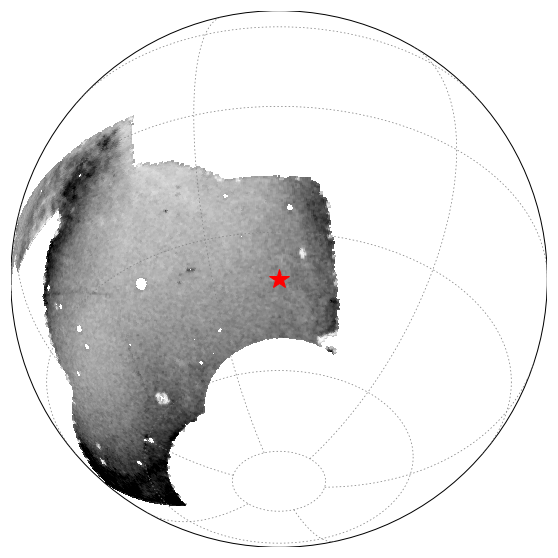

In [53]:
plot_density.plot_pretty(fontsize=15)
reload(plot_density)

mu = 16.8
coords='cel'
lon, lat = ra_ngc1851, dec_ngc1851
center = (lon, lat)
vmin, vmax = 0, 18
sigma = 0.2
proj = 'ortho'

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
smap = plot_density.plot_density(data, 0, center=center, vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=1000, smooth=sigma)

x, y = smap(ra_ngc1851, dec_ngc1851)
smap.plot(x, y, 'r*', ms=20)

Using ends =  [[85, -36], [82, -46]]
83.61410502152607 -41.0096670163826 77.35471390398209


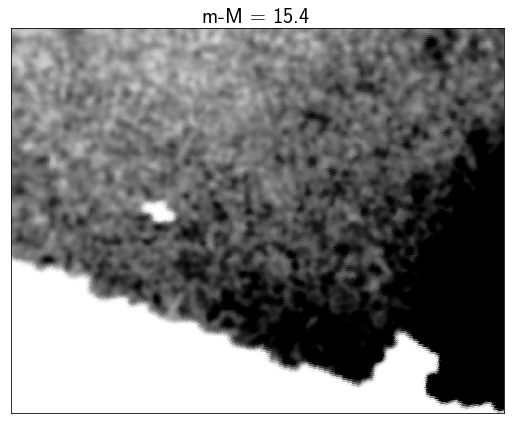

In [86]:
# %matplotlib notebook
%matplotlib inline
import plot_density_healpy
reload(plot_density_healpy)

stream = 'NGC 1851'
mu = mu_ngc1851

import plot_density_healpy
proj = plot_density_healpy.get_gnomonic_proj(stream=None, ends=[[85, -36], [82, -46]], rot=None, xsize=1024, ysize=800, reso=2.0)

smoothing = 0.2
hpxmap_smooth = hp.smoothing(hpxmap, sigma=np.radians(smoothing), verbose=False)
img = proj.projmap(hpxmap_smooth, func)

vmin, vmax = get_vscale(img, q=[12, 85])

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.imshow(img, origin='bottom', vmin=vmin, vmax=vmax, cmap='Greys', extent=proj.get_extent())
plt.title('m-M = %.1f' % mu, fontsize=22)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

x, y = proj.ang2xy(ra_ngc1851, dec_ngc1851, lonlat=True)
# plt.plot(x, y, 'r*', ms=20)

# RRL Stream

In [30]:
ends = [[-44.05, -56.54], [-56.98, -50.85]]

R = streamlib.get_rotmat(ends=ends)
print(R)
print()

from ugali.utils.projector import angsep
length = angsep(ends[0][0], ends[0][1], ends[1][0], ends[1][1])
print(length)
print()

82.0012347026844 61.883641889361726 246.30933912375065
[[ 0.37143994 -0.45794031 -0.80766518]
 [ 0.31493604  0.88047023 -0.35438322]
 [ 0.87341151 -0.12273079  0.47126371]]

9.513550146656277



In [47]:
# data = fitsio.open('../data/y6_rrl_stream.fits.gz')[1].data
data = fitsio.open('../data/y6_rrl_stream_coords.fits.gz')[1].data
data['RA'] -= 360*(data['RA'] > 180)

In [42]:
data.size, data

(1294015, FITS_rec([(-55.22912 , -46.039745, 21.6188069 , 21.39504142, 0),
           (-55.235644, -46.035715, 21.08314028, 20.62595491, 0),
           (-55.234905, -46.04122 , 22.82541573, 22.0136462 , 1), ...,
           (-40.368331, -63.354178, 21.56153023, 20.68445307, 0),
           (-40.341338, -63.356066, 23.732018  , 23.01711548, 0),
           (-40.346882, -63.359192, 18.25164243, 17.95813149, 0)],
          dtype=(numpy.record, [('RA', '>f8'), ('DEC', '>f8'), ('SOF_PSF_MAG_CORRECTED_G', '>f8'), ('SOF_PSF_MAG_CORRECTED_R', '>f8'), ('EXT_SOF', '>i2')])))

In [48]:
import rotation_matrix
# phi1, phi2 = rotation_matrix.phi12_rotmat(data['RA'], data['DEC'], R)
phi1, phi2 = data['PHI1'], data['PHI2']

In [46]:
# new_dtype = np.dtype(data.dtype.descr + [('PHI1', '>f8'), ('PHI2', '>f8')])

# new_data = np.zeros(data.shape, dtype=new_dtype)
# for descr in data.dtype.descr:
#     new_data[descr[0]] = data[descr[0]]

# new_data['PHI1'] = phi1
# new_data['PHI2'] = phi2

# from astropy import table
# new_data = table.Table(new_data)
# new_data.write('../data/y6_rrl_stream_coords.fits.gz')

dx, dy =  0.04 0.1666


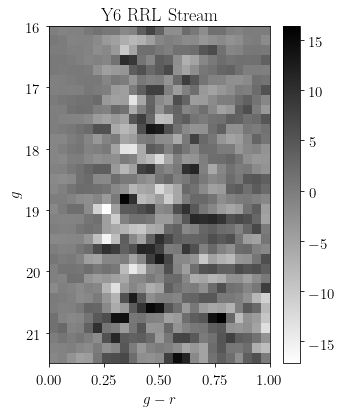

In [49]:
import plot_hess
reload(plot_hess)

width_on = 0.5
width_off = 0.5
separation = 2.0
off_min = separation - width_off / 2.
off_max = separation + width_off / 2.

sel_on = (np.abs(phi1) < length/2.) & (np.abs(phi2) < width_on/2.)
sel_off = (np.abs(phi1) < length/2.) & (np.abs(phi2) < off_max) & (np.abs(phi2) > off_min)

plot_hess.plot_hess( 'Y6\ RRL\ Stream', data[sel_on], data[sel_off], gband='SOF_PSF_MAG_CORRECTED_G', rband='SOF_PSF_MAG_CORRECTED_R', gmax=21.5, dx=0.04, dy=0.1666, no_bkg=False, smoothing=(.75, .25))
plt.colorbar()

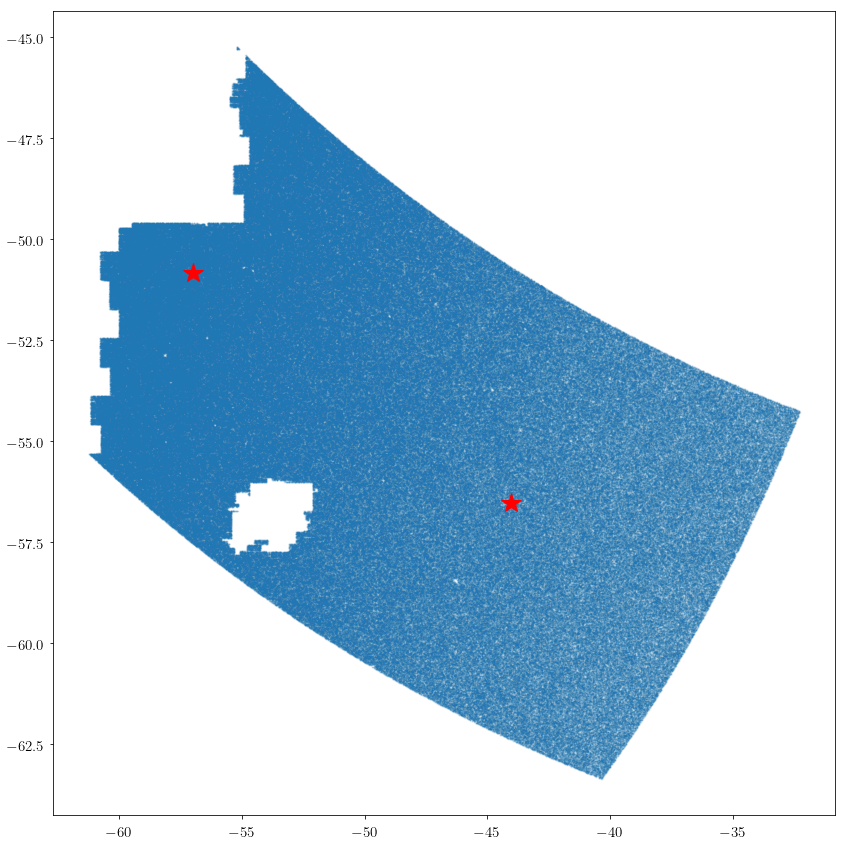

In [43]:
plt.scatter(data['RA'], data['DEC'], alpha=0.1, s=1)
plt.plot(ends[0][0], ends[0][1], 'r*', ms=20)
plt.plot(ends[1][0], ends[1][1], 'r*', ms=20)

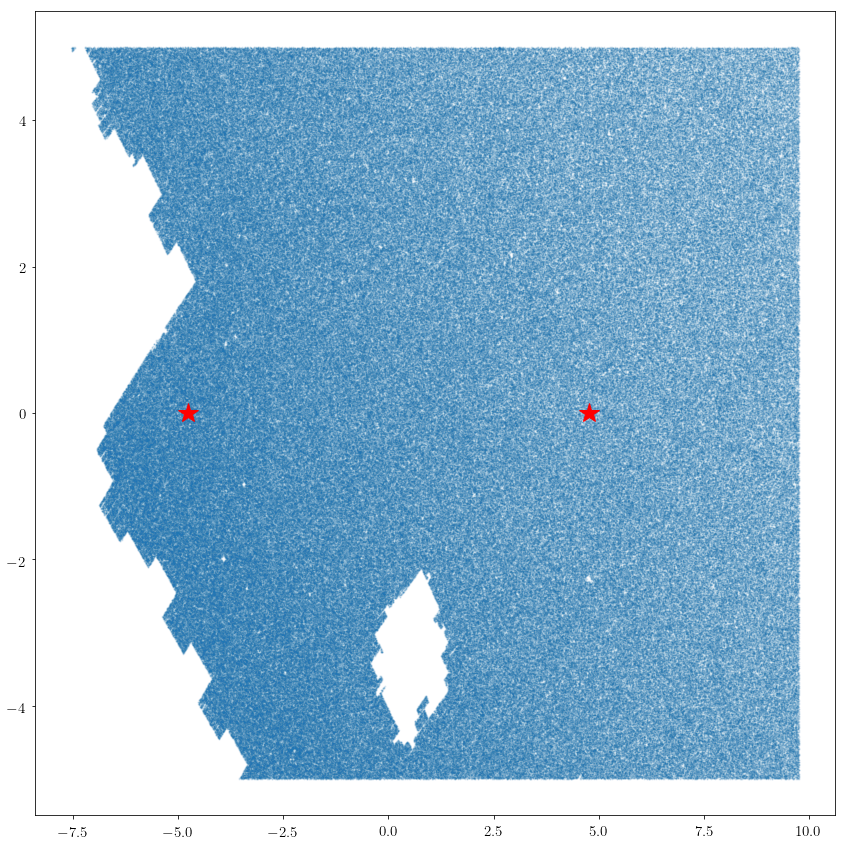

In [44]:
plt.scatter(phi1, phi2, alpha=0.1, s=1)
plt.plot(-length/2., 0, 'r*', ms=20)
plt.plot(+length/2., 0, 'r*', ms=20)